In [13]:
#  上課程式碼: * 讀取資料&pre-processing → pd.read_csv("data.csv")
iris=datasets.load_iris()
print(iris["feature_names"])
X=pd.DataFrame(iris["data"],columns=iris["feature_names"])  #把資料load進dataframe，且加上標題
X=X[["sepal length (cm)","petal length (cm)"]]    #  只要其中的兩項資料就好
print("target_names:"+str(iris["target_names"]))  #  iris的target names屬性資料有三種    
Y=pd.DataFrame(iris["target"],columns=["target"])  # 這三種target name的target屬性資料是0,1,2


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names:['setosa' 'versicolor' 'virginica']


In [31]:
# 切分訓練集與測試集   →   X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X[["sepal length (cm)","petal length (cm)"]],Y["target"],test_size=0.3)

# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing → pd.read_csv("data.csv")
* 切分訓練集與測試集   →   X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
* 模型配適  →  model=svm.SVC(...)   model.fit(X_train,y_train)
* 預測   →  pred_Y=model.predict(X_train)      pred_Y=model.predict(X_test)
* 評估(計算成績可能是誤差值或正確率或..)   →   model.score(X_train,y_train)  model.score(X_test,y_test)


In [2]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [3]:
iris = datasets.load_iris()
print(iris.DESCR)   # 對資料做一個綜觀的說明

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [13]:
#印出iris的key值與檔案位置
print(iris.keys())

#查看前10筆資料
print(iris.data[0:10])

# 查看資料型別
print(type(iris.data))  #是numpy的格式!!!

# 印出標註的樣本類別資料
print(iris.target_names)

# 檔案路徑
print(iris["filename"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
iris.csv


In [19]:
# we only take the first two features. 
X=iris.data[:,:2] #[row,column]取所有的row,前兩個column
print(X.shape)
Y=iris.target
print(Y)

(150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


In [25]:
#建立Target欄位與資料
y=pd.DataFrame(iris["target"],columns=["targets"])
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


In [33]:
#合併資料特徵欄位與目標欄位
iris_concat=pd.concat([x,y],axis=1)
iris_concat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
# 想要取其中的length的話:
iris_length=iris_concat[["sepal length (cm)","petal length (cm)"]]  #雙中括號
iris_length.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [43]:
#只選擇目標為0與1的資料→用.isin()
iris_01=iris_concat[iris_concat["targets"].isin([0,1])]  #中文翻譯:irisconcat，此資料中的targets項目，裡面有0和1的留下
iris_01.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
#看data資料大小 .size
iris["data"].size  #150x4

600

## 切分訓練集與測試集
> train_test_split()

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(iris_length,y,test_size=0.3)

In [ ]:
# 如果要再切分的話，把X_train再丟進train_test_splie裡面

In [72]:
X_train.head()
print(X_train.shape)
print(Y_train.shape)

(105, 2)
(105, 1)


In [73]:
X_test.head()
print(X_test.shape)
print(Y_test.shape)

(45, 2)
(45, 1)


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [94]:
# 手動的標準化: 把標準化寫成function
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)  #小、大、平、標


def z_score(df, stats):
    m, M, mu, s = stats
    result = pd.DataFrame()  # 先宣告一個標準化後的結果result
    for i in df.columns:
        result[i] = (df[i]-mu[i])/s[i]  #  針對每一項欄位中的資料，作全體運算:減去平均值除以標準差，且丟進剛剛的result中
    return result

In [86]:
type(X_train)
for i in X_train.columns:
    print(i)

sepal length (cm)
petal length (cm)


In [99]:
#  範例演示
stats = norm_stats(X_train)
print(stats)
arr_x_train = np.array(z_score(X_train, stats))   #zscore()出來的是dataframe，再把他改成numpy格式
print(arr_x_train)

stats = norm_stats(X_test)
print(stats)
arr_x_test = np.array(z_score(X_test, stats))   #zscore()出來的是dataframe，再把他改成numpy格式
print(arr_x_test)

(sepal length (cm)    4.3
petal length (cm)    1.0
dtype: float64, sepal length (cm)    7.7
petal length (cm)    6.9
dtype: float64, sepal length (cm)    5.862857
petal length (cm)    3.856190
dtype: float64, sepal length (cm)    0.821295
petal length (cm)    1.714305
dtype: float64)
[[ 0.53226058  0.60888194]
 [-0.44181107 -0.09111007]
 [-0.19829316  0.20055327]
 [ 2.23688599  1.65886995]
 [ 0.65401954  0.25888593]
 [-1.65940065 -1.49109408]
 [ 0.28874267  0.4922166 ]
 [-1.53764169 -1.66609208]
 [-0.44181107  0.08388793]
 [ 1.87160911  1.30887394]
 [-1.53764169 -1.37442875]
 [ 1.26281433  0.60888194]
 [ 0.28874267  0.4922166 ]
 [-0.80708794 -1.37442875]
 [ 0.28874267  0.43388393]
 [-0.32005212  0.02555526]
 [ 1.74985016  1.42553928]
 [ 0.7757785   1.13387594]
 [-1.41588273 -1.31609608]
 [ 1.01929641  0.6672146 ]
 [ 0.16698371  0.08388793]
 [ 1.14105537  0.55054927]
 [-0.32005212  0.1422206 ]
 [-1.7811596  -1.49109408]
 [-1.53764169 -1.43276142]
 [ 0.41050163  0.55054927]
 [-1.17236482

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\f

## use sklearn

In [96]:
#  用sklearn中的功能StandardScaler().fit(X_train)，可以直接幫你算平均值、標準查
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  # 叫出平均值
print(sc.scale_) # 叫出標準差

[5.86285714 3.85619048]
[0.82129481 1.71430529]


In [97]:
#  直接標準化用剛剛StandardScaler().fit(資料)完的資料 +  .transform(資料)
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 0.53226058,  0.60888194],
       [-0.44181107, -0.09111007],
       [-0.19829316,  0.20055327],
       [ 2.23688599,  1.65886995],
       [ 0.65401954,  0.25888593]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [100]:
#  之後的資料若省略前面的步驟直接sc.transform(資料)，會是錯的!!!!!!!!!，因為此時用的scaler資料是前面train的平均值和標準差去運算的
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-0.9288469  -1.14109808]
 [ 0.65401954  1.01721061]
 [-0.80708794  0.02555526]
 [-0.19829316 -1.25776341]
 [ 1.6280912   1.30887394]
 [-1.29412377 -1.31609608]
 [ 1.01929641  0.3172186 ]
 [-1.29412377 -1.43276142]
 [-1.29412377 -1.31609608]
 [ 2.4804039   1.48387194]]


you can also use fit_transform method (i.e., fit and then transform)    

In [102]:
#  阿如果加上.fit就是對的!!!!
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.83787272 -0.88520631]
 [ 0.72313219  1.12552835]
 [-0.71779542  0.20167729]
 [-0.11740892 -0.99389467]
 [ 1.6837506   1.39724925]
 [-1.19810463 -1.04823885]
 [ 1.0833641   0.47339819]
 [-1.19810463 -1.15692721]
 [-1.19810463 -1.04823885]
 [ 2.52429171  1.56028179]]


In [104]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))   #標準化後資料的平均值
print('std of X_train_std:',X_train_std.std())  #標準化後資料的標準差

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.94109270440332
31.15239732752756


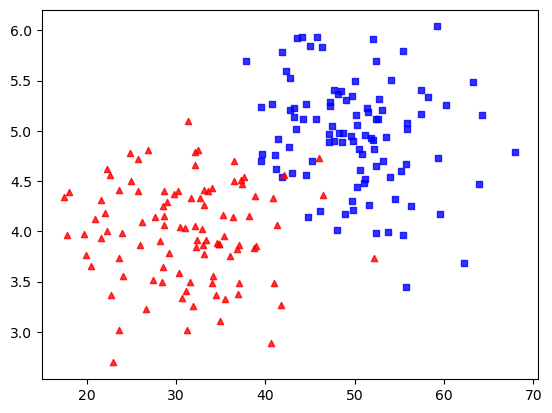

In [106]:
#  生成200個亂數資料
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [107]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [108]:
#  土法煉鋼直接定義function
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [36]:
minmax_norm(x_val[:10])

array([0.12277553, 0.93183879, 0.56269276, 0.31105516, 0.34768417,
       0.17620994, 0.        , 0.09094066, 0.15955258, 1.        ])

In [131]:
#  高級做法: MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)  # 因為原本是一維資料，我要變成二維資料
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[0:5])

[67.98435624]
[17.49728527]
[[0.6591035 ]
 [0.79107052]
 [0.74698489]
 [0.67901878]
 [0.6864753 ]]


In [142]:
#  結論
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,test_size=0.3)

from sklearn.preprocessing import StandardScaler
s=StandardScaler().fit_transform(X_test)
print(type(s))


from sklearn.preprocessing import MinMaxScaler
np.array(X_test).reshape(-1,1)  #轉成二維
n=MinMaxScaler().fit_transform(X_test)  #這邊變成_transform了，不是點??
print(n[0:5])
print(type(n))

check=minmax_norm(X_test)
print(check[0:5])
print(type(check))

<class 'numpy.ndarray'>
[[0.48484848 0.21052632 0.73214286 0.625     ]
 [0.12121212 0.42105263 0.10714286 0.04166667]
 [0.21212121 0.78947368 0.08928571 0.08333333]
 [0.39393939 0.78947368 0.125      0.08333333]
 [0.18181818 0.52631579 0.07142857 0.04166667]]
<class 'numpy.ndarray'>
[[0.48484848 0.21052632 0.73214286 0.625     ]
 [0.12121212 0.42105263 0.10714286 0.04166667]
 [0.21212121 0.78947368 0.08928571 0.08333333]
 [0.39393939 0.78947368 0.125      0.08333333]
 [0.18181818 0.52631579 0.07142857 0.04166667]]
<class 'numpy.ndarray'>
